In [ ]:
#fractal de bordes y no se que más
#el del primer laboratorio

In [7]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

In [8]:
def lineFit(x, y):
    xavg = x.mean()
    slope = (y * (x - xavg)).sum() / (x * (x - xavg)).sum()
    yint = y.mean() - slope * xavg
    return slope, yint

[[-1 -1 -1 ... -1 -1 -1]
 [-1  0  0 ...  0  0 -1]
 [-1  0  0 ...  0  0 -1]
 ...
 [-1  0  0 ...  0  0 -1]
 [-1  0  0 ...  0  0 -1]
 [-1 -1 -1 ... -1 -1 -1]]


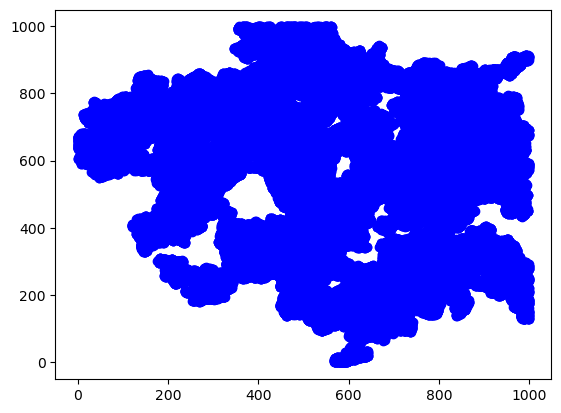

In [10]:
L = 1000 #lados de la red
p =0.59275 #probabilidad de ocupación

def HLA(L,p):
    N = L*L #casillas en la red
    site = np.zeros((L+2,L+2),dtype = np.short) #tipo el parent
    # -1 significa sitio vacio, 0 sitio por preguntar, 1 sitio lleno, 2 perimetro
    perx = np.array([],dtype = int) #arreglos de los perimetros
    pery = np.array([],dtype = int)

    #Las paredes dentro de site
    for i in range(0,L+2): #bordes
        site[0,i] = -1
        site[i,0] = -1
        site[L+1,i] = -1
        site[i,L+1] = -1

    #desplazamiento a vecinos
    nx = np.array([1,0,-1,0]) #para hacer la operación matemática que te mueva de vecino
    ny = np.array([0,1,0,-1])

    #Sitio inicial
    xseed = L//2 #empezamos enmedio
    yseed = L//2
    site[yseed,xseed] = 1 #el primero es 1
    xCluster = np.array([xseed])
    yCluster = np.array([yseed]) #se añado al cluster
    Ncluster = 1   #numero de sitios pertenecientes al cluster

#Generación del primer perimetro
    for i in range(4): #porque se tienen 4 posibles vecinos
        newperx = xseed + nx[i] #primera operación para primer vecino
        newpery = yseed + ny[i]
        perx = np.append(perx,newperx) #se añade al arreglo perimetro del cluster
        pery = np.append(pery,newpery)
        site[newperx,newpery] = 2 #se le asigna el numero correspondiente al perimetro

    Nper = 4 #nuevo numero de elementos del perimetro

    while Nper>0: #mientras siga habiendo perimetro
        indice = nr.randint(Nper) #Escogemos uno al azar
        xnew = perx[indice] #tomamos del per y lo sacamos
        ynew = pery[indice]
        perx = np.delete(perx,indice)
        pery = np.delete(pery,indice)
        Nper -= 1 #restamos ese bloque de el núemro del perimetro

        escoger=np.random.random()
        if escoger < p: #si se llena o no
            site[xnew,ynew]=1 #parte del cluster
            xCluster=np.append(xCluster,xnew)#se agrega al cluster
            yCluster=np.append(yCluster,ynew)
            for i in range(4): #4vecinos
                newperx = xnew + nx[i]
                newpery = ynew + ny[i]
                if site[newperx,newpery]==0: #se checa los vecinos
                    perx = np.append(perx,newperx) #se añaden al per
                    pery = np.append(pery,newpery)
                    site[newperx,newpery] = 2 #se le asigna status de vecino
                    Nper +=1 #se añade al numero de vecinos
        else: #no se llena
            site[xnew,ynew]=-1
    print(site)
    return xCluster-1,yCluster-1
xCluster, yCluster=HLA(L,p)
fig, ax = plt.subplots()
ax.plot(xCluster, yCluster, 'bo')
plt.show()

In [ ]:
#Estimado de la dimensión fractal

In [ ]:
# a partir de un radio se calcula cuántas cajas están llenas en ese radio
# y ese es la dimension fractal

In [ ]:
# a partir de un site dado

In [ ]:
def MassDist(L,xCluster,yCluster,Ncluster):
    #Claculo del centro de masas
    global xcm, ycm
    xcm = xCluster.mean() #medio del cluster
    ycm = yCluster.mean() #medio del cluster
    dx = xCluster - xcm #arreglo con las diferencias
    dy = yCluster - ycm 
    dr = np.sqrt(dx*dx + dy*dy) #arreglo del radio
    massinside = []
    r = []
    imax=int(np.log2(L)) 
    for i in range(1,imax):
        massinside.append(dr[dr<=(2**i)].size) 
        r.append(2**i)
    r = np.array(r)
    massinside= np.array(massinside)
    return r, massinside

site2 = np.load("site.npy",allow_pickle = True)
#np.save("site.npy",site)
print(site2.shape)
L = 128
#extraer de site el aglomerado expandido
cluster = np.argwhere(site2 == 1)
print(cluster.shape)
yCluster = cluster[:,0]-1 #Recordar paredes -1
xCluster = cluster[:,1]-1
Ncluster = xCluster.size
r,M = MassDist(128,xCluster,yCluster,Ncluster) 
print(r,M) 

#el error es porque no tengo el archivo site.npy

In [ ]:
def MassDist(L,xCluster,yCluster):
    Ncluster = xCluster.size
    #Claculo del centro de masas
    xcm = xCluster[:Ncluster].mean()
    ycm = yCluster[:Ncluster].mean()
    #calculo de los dx
    dx = xCluster[:Ncluster] - xcm
    dy = yCluster[:Ncluster] - ycm
    #calculo de los dr
    dr = np.sqrt(dx*dx + dy*dy)
    massinside = []
    r = []
    imax=int(np.log2(L))
    for i in range(1,imax):
        #para hacer los arreglos de masa y r
        massinside.append(dr[dr<=(2**i)].size) #no entiendo este
        r.append(2**i)
    return np.array(r),np.array(massinside)

In [ ]:
L=128
N=L**2
p=0.5927
muestras=100
M_mean=np.zeros(6) #i-1
i=0
while i<100: #hacer muchas realizaciónes
    clusterx,clustery=HLA(L,p)
    
    if(clusterx.size>1000):
        r, M = MassDist(L,clusterx,clustery)
        M_mean+=M
        i+=1
    
        
promM= M_mean/muestras

print (promM,r)

In [ ]:
#para hacer el calculo de la dimensión fractal
slope, corte=lineFit(np.log(r),np.log(promM))
error= np.abs((slope-1.89)/1.89)*100 #1.89 ya está por default

print("dim fractal= {}, error= {}%".format(round(slope,2),round(error,1)))

In [ ]:
plt.figure(figsize=(8,6))
plt.loglog(r,promM,'bo')
plt.plot(r,np.exp(corte)*r**slope,color='red',dashes=(3,1))
plt.xlabel("r", fontsize=24)
plt.ylabel("M", fontsize=24)
plt.text(r.min(),0.9*M.max(), r'$d_f=$ {}'.format(round(slope,2)),fontsize=18)

In [1]:
#siepinsky gasket

In [2]:
def SierpinskiGasket(x1,y1,L,n):
    '''
        x1,y1: coordenadas del vertice izquierdo L: longitud del triangulo a subdividir 
        n: número de interaciones
    '''
    if n>0:
        x2 = x1 + L/2
        y2 = y1
        x3 = x1 + L/4
        y3 = y1 + np.sqrt(3)*L/4

        SierpinskiGasket(x1,y1,L/2,n-1)
        SierpinskiGasket(x2,y2,L/2,n-1)
        SierpinskiGasket(x3,y3,L/2,n-1)
    else:
        triangulo = plt.Polygon([[x1, y1], [x1+L, y1], [x1+L/2, y1+np.sqrt(3)*L/2]],color='g')
        ax.add_patch(triangulo)

In [3]:
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0,600)
ax.set_ylim(0,600)
ax.set_xticks([])
ax.set_yticks([])
r = 7
SierpinskiGasket(0,0,600,r)
plt.show()

NameError: name 'fig' is not defined

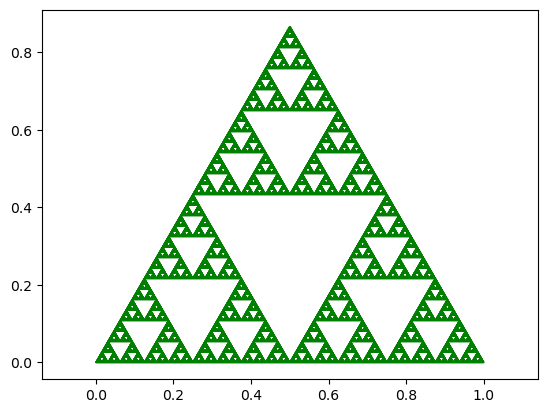

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

def SierpinskiGasket(x1,y1,L,n):
    '''
        x1,y1: coordenadas del vertice izquierdo L: longitud del triangulo a subdividir 
        n: número de interaciones
    '''
    if n>0:
        x2 = x1 + L/2
        y2 = y1
        x3 = x1 + L/4
        y3 = y1 + np.sqrt(3)*L/4

        SierpinskiGasket(x1,y1,L/2,n-1)
        SierpinskiGasket(x2,y2,L/2,n-1)
        SierpinskiGasket(x3,y3,L/2,n-1)
    else:
        triangulo = plt.Polygon([[x1, y1], [x1+L, y1], [x1+L/2, y1+np.sqrt(3)*L/2]],color='g')
        ax.add_patch(triangulo)

SierpinskiGasket(0,0,1,12) # call the function with the desired parameters

plt.axis('equal') # set the axis to be equal and show the plot
plt.show()


In [11]:
#la curva de koch

def curvaKoch(x1,y1,x2,y2,n):
    '''
        x1,y1: punto izquierdo de la línea a subdividir
        x2,y2: punto derecho de la líne a subdividir
        n: número de interaciones
    '''
    if n>0:
        dx = (x2-x1)
        dy = (y2-y1)
        x1p = x1+dx/3
        y1p = y1+dy/3
        x2p = x1+2*dx/3
        y2p = y1+2*dy/3
        x3p = x1p + dx/6 - np.sqrt(3)*dy/6
        y3p = y1p + dy/6 + np.sqrt(3)*dx/6
        
        curvaKoch(x1,y1,x1p,y1p,n-1)
        curvaKoch(x1p,y1p,x3p,y3p,n-1)
        curvaKoch(x3p,y3p,x2p,y2p,n-1)
        curvaKoch(x2p,y2p,x2,y2,n-1)
    else:
        plt.plot([x1,x2],[y1,y2],'b',linewidth=2.0)


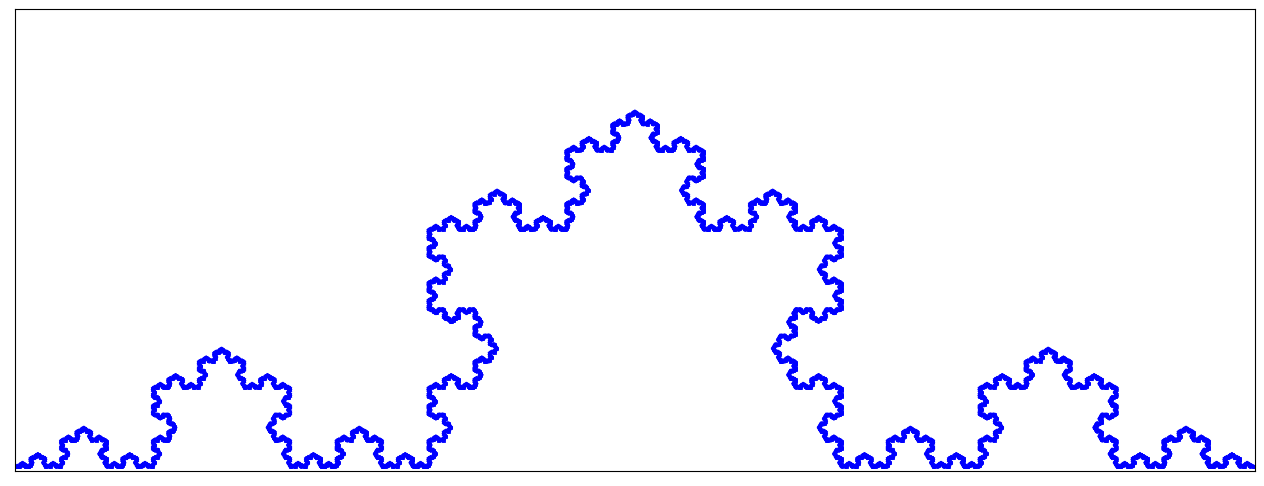

In [12]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-300,300)
ax.set_ylim(-2,300*3/4-2)
ax.set_xticks([])
ax.set_yticks([])
curvaKoch(-300,0,300,0,7)
plt.savefig('KochGenerador.png')

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def curvaKoch(x1, y1, x2, y2, n):
    '''
        x1, y1: bottom-left point of the line to subdivide
        x2, y2: top-right point of the line to subdivide
        n: number of iterations
    '''
    if n > 0:
        dx = (x2 - x1) / 3
        dy = (y2 - y1) / 3
        x1p = x1 + dx
        y1p = y1 + dy
        x2p = x2 - dx
        y2p = y1 + dy
        x3p = x2 - dx
        y3p = y2 - dy
        x4p = x1 + dx
        y4p = y2 - dy
        
        curvaKoch(x1, y1, x1p, y1p, n - 1)
        curvaKoch(x1p, y1p, x2p, y2p, n - 1)
        curvaKoch(x2p, y2p, x3p, y3p, n - 1)
        curvaKoch(x3p, y3p, x4p, y4p, n - 1)
        curvaKoch(x4p, y4p, x1, y1, n - 1)
    else:
        plt.plot([x1, x2, x3, x4, x1], [y1, y2, y3, y4, y1], 'b', linewidth=2.0)
        
# Example usage:
curvaKoch(0, 0, 1, 1, 4)
plt.show()


NameError: name 'x3' is not defined

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def curvaKoch(x1, y1, x2, y2, n):
    '''
        x1, y1: bottom-left point of the line to subdivide
        x2, y2: top-right point of the line to subdivide
        n: number of iterations
    '''
    if n > 0:
        dx = (x2 - x1) / 3
        dy = (y2 - y1) / 3
        x1p = x1 + dx
        y1p = y1 + dy
        x2p = x2 - dx
        y2p = y1 + dy
        x3p = x2 - dx
        y3p = y2 - dy
        x4p = x1 + dx
        y4p = y2 - dy
        
        curvaKoch(x1, y1, x1p, y1p, n - 1)
        curvaKoch(x1p, y1p, x2p, y2p, n - 1)
        curvaKoch(x2p, y2p, x3p, y3p, n - 1)
        curvaKoch(x3p, y3p, x4p, y4p, n - 1)
        curvaKoch(x4p, y4p, x1, y1, n - 1)
    else:
        plt.plot([x1, x1 + dx, x2 - dx, x2, x2 - dx, x1 + dx, x1],
                 [y1, y1 + dy, y1 + dy, y2, y2 - dy, y2 - dy, y1], 'b', linewidth=2.0)
        
# Example usage:
curvaKoch(0, 0, 1, 1, 4)
plt.show()


UnboundLocalError: local variable 'dx' referenced before assignment

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def curvaKoch(x1, y1, x2, y2, n):
    '''
        x1, y1: bottom-left point of the line to subdivide
        x2, y2: top-right point of the line to subdivide
        n: number of iterations
    '''
    if n == 0:
        plt.plot([x1, x2], [y1, y2], 'b', linewidth=2.0)
    else:
        dx = (x2 - x1) / 3
        dy = (y2 - y1) / 3
        x1p = x1 + dx
        y1p = y1 + dy
        x2p = x2 - dx
        y2p = y1 + dy
        x3p = x2 - dx
        y3p = y2 - dy
        x4p = x1 + dx
        y4p = y2 - dy
        
        curvaKoch(x1, y1, x1p, y1p, n - 1)
        curvaKoch(x1p, y1p, x2p, y2p, n - 1)
        curvaKoch(x2p, y2p, x3p, y3p, n - 1)
        curvaKoch(x3p, y3p, x4p, y4p, n - 1)
        curvaKoch(x4p, y4p, x1, y1, n - 1)
        
# Example usage:
curvaKoch(0, 0, 1, 1, 8)
plt.show()


KeyboardInterrupt: 

In [1]:
import turtle

def koch_curve(t, order, size):
    if order == 0:
        t.forward(size)
    else:
        for angle in [90, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38, -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51, -52, -53, -54, -55, -56, -57, -58, -59, -60, -61, -62, -63, -64, -65, -66, -67, -68, -69, -70, -71, -72, -73, -74, -75, -76, -77, -78, -79, -80, -81, -82, -83, -84, -85, -86, -87, -88, -89, -90, -91, -92, -93, -94, -95, -96, -97, -98, -99, -100, -101, -102, -103, -104, -105, -106, -107, -108, -109, -110, -111, -112, -113, -114, -115, -116, -117, -118, -119, -120, -121, -122, -123, -124, -125, -126, -127, -128, -129, -130, -131, -132, -133, -134, -135, -136, -137, -138, -139, -140, -141, -142, -143, -144, -145, -146, -147, -148, -149, -150, -151, -152, -153, -154, -155, -156, -157, -158, -159, -160, -161, -162, -163, -164, -165, -166, -167, -168, -169, -170, -171, -172, -173, -174, -175, -176, -177, -178, -179, -180,0]:
            koch_curve(t, order-1, size/3)
            t.left(angle)

# Create the turtle
t = turtle.Turtle()

# Set the speed and size
t.speed(0)
size = 500

# Move the turtle to the starting position
t.penup()
t.goto(-150, 0)
t.pendown()

# Draw the Koch curve
koch_curve(t, 4, size)

# Hide the turtle
t.hideturtle()

# Keep the window open until it's closed manually
turtle.done()


Terminator: 

In [2]:
import math

# Set up the initial line segment
start = (100, 300)
end = (700, 300)
line = [start, end]

# Set up the Koch curve generation
order = 4
for i in range(order):
    new_line = []
    for j in range(len(line)-1):
        p1 = line[j]
        p2 = line[j+1]
        dx = p2[0] - p1[0]
        dy = p2[1] - p1[1]
        dist = math.sqrt(dx**2 + dy**2)
        angle = math.atan2(dy, dx)
        unit = dist / 3
        mid1 = (p1[0] + dx/3, p1[1] + dy/3)
        mid2 = (p1[0] + 2*dx/3, p1[1] + 2*dy/3)
        tip = (mid1[0] + math.cos(angle + math.pi/3)*unit, 
               mid1[1] + math.sin(angle + math.pi/3)*unit)
        new_line += [p1, mid1, tip, mid2]
    new_line.append(end)
    line = new_line

# Print the resulting points
for point in line:
    print(point)

(100, 300)
(107.4074074074074, 300.0)
(111.11111111111111, 306.41500299099584)
(114.81481481481482, 300.0)
(122.22222222222223, 300.0)
(125.92592592592594, 306.41500299099584)
(122.22222222222223, 312.8300059819917)
(129.62962962962965, 312.8300059819917)
(133.33333333333334, 319.24500897298753)
(137.03703703703704, 312.8300059819917)
(144.44444444444446, 312.8300059819917)
(140.74074074074076, 306.41500299099584)
(144.44444444444446, 300.0)
(151.85185185185188, 300.0)
(155.55555555555557, 306.41500299099584)
(159.25925925925927, 300.0)
(166.66666666666669, 300.0)
(170.37037037037038, 306.41500299099584)
(166.66666666666669, 312.8300059819917)
(174.0740740740741, 312.8300059819917)
(177.7777777777778, 319.24500897298753)
(174.0740740740741, 325.6600119639834)
(166.66666666666669, 325.6600119639834)
(170.37037037037038, 332.0750149549792)
(166.66666666666669, 338.49001794597507)
(174.0740740740741, 338.49001794597507)
(177.7777777777778, 344.9050209369709)
(181.4814814814815, 338.490017

In [3]:
import turtle

def koch_curve(t, order, size):
    if order == 0:
        t.forward(size)
    else:
        for angle in [60, -120, 60, 0]:
            koch_curve(t, order-1, size/3)
            t.left(angle)

def mickey_mouse_koch_curve():
    t = turtle.Turtle()
    t.speed('fastest')
    t.penup()
    t.goto(-200, 0)
    t.pendown()
    t.pensize(2)

    # Draw Mickey's head
    koch_curve(t, 4, 400)

    # Move to draw Mickey's ears
    t.penup()
    t.goto(-75, 200)
    t.pendown()
    koch_curve(t, 4, 150)

    t.penup()
    t.goto(75, 200)
    t.pendown()
    koch_curve(t, 4, 150)

    turtle.done()

mickey_mouse_koch_curve()

In [5]:
import turtle

def koch_curve(t, order, size):
    if order == 0:
        t.forward(size)
    else:
        for angle in [90, -90,-90,90,0]:
            koch_curve(t, order-1, size/2)
            t.left(angle)

# Create the turtle
t = turtle.Turtle()

# Set the speed and size
t.speed(0)
size = 300

# Move the turtle to the starting position
t.penup()
t.goto(-150, 0)
t.pendown()

# Draw the Koch curve
koch_curve(t, 8, size)

# Hide the turtle
t.hideturtle()

# Keep the window open until it's closed manually
turtle.done()


Terminator: 

: 